In [194]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib as plt
import seaborn as sns

In [10]:
df = pd.read_csv(r'C:\Users\SMS Digital\Downloads\Lab2\Stromerzeuger_complete_data.csv', sep=';', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),MaStR-Nr. der KWK-Anlage,Inbetriebnahmedatum der KWK-Anlage,Elektrische KWK-Leistung,Thermische Nutzleistung in kW
1,SEE903048865665,PV-Anlage Grüner Weg,In Betrieb,Solare Strahlungsenergie,"1617,84","1266,8",3/30/2012,2/5/2019,Nordrhein-Westfalen,37688,...,SEL923040465625,EEG991093682733,E20998010101000000000000212E00001,3/30/2012,"1617,84",NaN,NaN,NaN,NaN,NaN
2,SEE925446927554,Solar Mover Erlasee,In Betrieb,Solare Strahlungsenergie,"9,034","9,034",7/1/2005,1/31/2019,Bayern,97450,...,SEL940958932889,EEG958469144820,E21875011000000000000358198600000,7/1/2005,"9,034",NaN,NaN,NaN,NaN,NaN
3,SEE960426755222,Photovoltaikanlage Wachenroth,In Betrieb,Solare Strahlungsenergie,"749,52",660,1/30/2019,1/31/2019,Bayern,96193,...,SEL967701874609,EEG908722130251,NaN,1/30/2019,"749,52",NaN,NaN,NaN,NaN,NaN
4,SEE968655901175,PVA Rosselstein,In Betrieb,Solare Strahlungsenergie,"743,4",600,1/8/2019,2/1/2019,Saarland,66763,...,SEL916846079561,EEG912589807836,E3010301DE00014066763000010000324,1/8/2019,"743,4",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14266,SEE901367472489,MWetzels,In Betrieb,Solare Strahlungsenergie,"0,6","0,6",11/24/2022,11/24/2022,Schleswig-Holstein,25712,...,SEL989091665100,EEG958390761431,NaN,11/24/2022,"0,6",NaN,NaN,NaN,NaN,NaN
14267,SEE915055764886,Solarzaun,In Betrieb,Solare Strahlungsenergie,"5,85","5,85",11/9/2022,11/24/2022,Sachsen-Anhalt,06198,...,SEL927418902989,EEG943068375881,NaN,11/9/2022,"5,85",NaN,NaN,NaN,NaN,NaN
14268,SEE970131796687,Garten,In Betrieb,Solare Strahlungsenergie,"0,7","0,7",6/30/2022,11/24/2022,Nordrhein-Westfalen,41063,...,SEL922771172529,EEG942203371894,NaN,6/30/2022,"0,7",NaN,NaN,NaN,NaN,NaN
14269,SEE937524761370,PV FREIFLAECHE,In Betrieb,Solare Strahlungsenergie,"7,7","7,7",11/23/2022,11/24/2022,Baden-Württemberg,77839,...,SEL937805100102,EEG914905957928,NaN,11/23/2022,"7,7",NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,14271,14271,14271,14271,14271,14271,13906,14271,14266,14271,...,13866,13906,10363,13906,13906,1340,1,1,1,1
unique,14271,12528,5,2,8066,4822,3398,1330,17,3803,...,10513,13906,10242,3397,7902,1081,1,1,1,1
top,MaStR-Nr. der Einheit,Garten,In Betrieb,Solare Strahlungsenergie,"0,6","0,6",12/31/2011,1/31/2021,Bayern,97450,...,SEL967654072817,MaStR-Nr. der EEG-Anlage,E20793019000000000000021298620001,12/31/2011,"0,6","SOL20-2/053,",MaStR-Nr. der KWK-Anlage,Inbetriebnahmedatum der KWK-Anlage,Elektrische KWK-Leistung,Thermische Nutzleistung in kW
freq,1,139,13835,14270,285,559,288,216,4676,772,...,151,1,17,288,267,10,1,1,1,1


In [ ]:
gdf = gpd.GeoDataFrame(df ,geometry= gpd.points_from_xy(df.longitude,
df.latitude), crs="epsg:4326")
gdf.crs

In [158]:
data_shp = gpd.read_file(r'C:\Users\SMS Digital\Downloads\Lab2\plz-5stellig.shp\plz-5stellig.shp')
data_shp.head()
print(data_shp.crs)

epsg:4326


<AxesSubplot: >

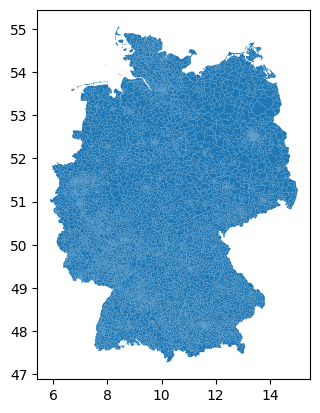

In [9]:
data_shp.plot()

In [13]:
data_shp.crs
data_shp2 = data_shp.to_crs(epsg = 3857 )

<AxesSubplot: >

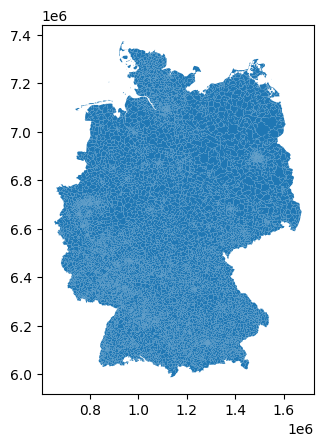

In [15]:
data_shp2.plot()

In [20]:
data_shp2.plot(column="plz", figsize=(12,12),cmap="gist_ncar", legend=True)

<AxesSubplot: >

ValueError: Image size of 732x171162 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x1200 with 1 Axes>

In [131]:
df_east_agropv  = pd.read_csv(r"C:\Users\SMS Digital\Downloads\Lab2\Stromerzeuger_east_data.csv", sep=';')
df_east_agropv

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),MaStR-Nr. der KWK-Anlage,Inbetriebnahmedatum der KWK-Anlage,Elektrische KWK-Leistung,Thermische Nutzleistung in kW
0,SEE947307492223,solar400 1,In Betrieb,Solare Strahlungsenergie,"287,5",273,12/29/2010,2/1/2019,Sachsen,9648,...,SEL933499539853,EEG906843602237,E41081010000000000000000000140851,12/29/2010,"287,5",NaN,NaN,NaN,NaN,NaN
1,SEE982140864486,AuerSolarI/I,In Betrieb,Solare Strahlungsenergie,"989,4",875,12/11/2010,2/3/2019,Sachsen-Anhalt,6198,...,SEL945203720655,EEG966469267302,E41081010000000000000000000158799,12/11/2010,"989,4",NaN,NaN,NaN,NaN,NaN
2,SEE900237780105,39444 Hecklingen,In Betrieb,Solare Strahlungsenergie,"747,06","747,06",1/31/2019,2/1/2019,Sachsen-Anhalt,39444,...,SEL930855180247,EEG905480216517,NaN,1/31/2019,"747,06",NaN,NaN,NaN,NaN,NaN
3,SEE994799308280,solar400 2,In Betrieb,Solare Strahlungsenergie,"287,5",262,12/29/2010,2/1/2019,Sachsen,9648,...,SEL918111377983,EEG925673608240,E41081010000000000000000000165516,12/29/2010,"287,5",NaN,NaN,NaN,NaN,NaN
4,SEE994872405684,SP Elsteraue Basis,In Betrieb,Solare Strahlungsenergie,"2283,54",2023,5/19/2011,2/1/2019,Sachsen-Anhalt,6729,...,SEL938641335314,EEG962965671544,E41081010000000000000000000159269,5/19/2011,"2283,54",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,SEE997194319011,PVA Sergen West II,In Planung,Solare Strahlungsenergie,"31349,03",29455,NaN,11/17/2022,Brandenburg,3058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2877,SEE963703390772,GR-HvG3B-600W-G,In Planung,Solare Strahlungsenergie,"0,8","0,6",NaN,11/21/2022,Sachsen,2827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2878,SEE931020303058,Solarpark Göda-Gaußig - P20-023 - Teil 4,In Betrieb,Solare Strahlungsenergie,"3079,56",2540,11/23/2022,11/23/2022,Sachsen,2633,...,SEL912593382787,EEG908020485459,NaN,11/23/2022,"3079,56","SOL21-1/240,",NaN,NaN,NaN,NaN
2879,SEE993523763937,Garten /Pool,In Planung,Solare Strahlungsenergie,"0,79","0,6",NaN,11/24/2022,Sachsen,1619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
#df_east_agropv.isnull().sum()
columns_to_drop = df_east_agropv.columns[df_east_agropv.isnull().sum()>=2000].tolist()
columns_to_drop
print(len(columns_to_drop))

18


In [133]:
df_clean = df_east_agropv.drop(columns_to_drop,axis=1)
df_clean

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,Volleinspeisung oder Teileinspeisung,Name des Anschluss-Netzbetreibers,MaStR-Nr. des Anschluss-Netzbetreibers,Netzbetreiberprüfung,Spannungsebene,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung
0,SEE947307492223,solar400 1,In Betrieb,Solare Strahlungsenergie,"287,5",273,12/29/2010,2/1/2019,Sachsen,9648,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL933499539853,EEG906843602237,E41081010000000000000000000140851,12/29/2010,"287,5"
1,SEE982140864486,AuerSolarI/I,In Betrieb,Solare Strahlungsenergie,"989,4",875,12/11/2010,2/3/2019,Sachsen-Anhalt,6198,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Mittelspannung,SEL945203720655,EEG966469267302,E41081010000000000000000000158799,12/11/2010,"989,4"
2,SEE900237780105,39444 Hecklingen,In Betrieb,Solare Strahlungsenergie,"747,06","747,06",1/31/2019,2/1/2019,Sachsen-Anhalt,39444,...,Volleinspeisung,Avacon Netz GmbH (SNB990362338043),SNB990362338043,Geprüft,Mittelspannung,SEL930855180247,EEG905480216517,NaN,1/31/2019,"747,06"
3,SEE994799308280,solar400 2,In Betrieb,Solare Strahlungsenergie,"287,5",262,12/29/2010,2/1/2019,Sachsen,9648,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung; Mittelspannung; Mittelspannung,SEL918111377983,EEG925673608240,E41081010000000000000000000165516,12/29/2010,"287,5"
4,SEE994872405684,SP Elsteraue Basis,In Betrieb,Solare Strahlungsenergie,"2283,54",2023,5/19/2011,2/1/2019,Sachsen-Anhalt,6729,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL938641335314,EEG962965671544,E41081010000000000000000000159269,5/19/2011,"2283,54"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,SEE997194319011,PVA Sergen West II,In Planung,Solare Strahlungsenergie,"31349,03",29455,NaN,11/17/2022,Brandenburg,3058,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,NaN,Hochspannung,NaN,NaN,NaN,NaN,NaN
2877,SEE963703390772,GR-HvG3B-600W-G,In Planung,Solare Strahlungsenergie,"0,8","0,6",NaN,11/21/2022,Sachsen,2827,...,Teileinspeisung (einschließlich Eigenverbrauch),Stadtwerke Görlitz AG (SNB938672757734),SNB938672757734,NaN,Niederspannung (= Hausanschluss/Haushaltsstrom),NaN,NaN,NaN,NaN,NaN
2878,SEE931020303058,Solarpark Göda-Gaußig - P20-023 - Teil 4,In Betrieb,Solare Strahlungsenergie,"3079,56",2540,11/23/2022,11/23/2022,Sachsen,2633,...,Volleinspeisung,SachsenNetze HS.HD GmbH (SNB968914838013),SNB968914838013,In Prüfung,Umspannebene Hochspannung/Mittelspannung,SEL912593382787,EEG908020485459,NaN,11/23/2022,"3079,56"
2879,SEE993523763937,Garten /Pool,In Planung,Solare Strahlungsenergie,"0,79","0,6",NaN,11/24/2022,Sachsen,1619,...,Teileinspeisung (einschließlich Eigenverbrauch),SachsenNetze HS.HD GmbH (SNB968914838013),SNB968914838013,NaN,Niederspannung (= Hausanschluss/Haushaltsstrom),NaN,NaN,NaN,NaN,NaN


In [134]:
df_clean=df_clean.dropna(subset = ['Koordinate: Breitengrad (WGS84)', 'Koordinate: Längengrad (WGS84)'])

In [139]:
df_clean

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,Volleinspeisung oder Teileinspeisung,Name des Anschluss-Netzbetreibers,MaStR-Nr. des Anschluss-Netzbetreibers,Netzbetreiberprüfung,Spannungsebene,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung
0,SEE947307492223,solar400 1,In Betrieb,Solare Strahlungsenergie,287.5,273,12/29/2010,2/1/2019,Sachsen,9648,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL933499539853,EEG906843602237,E41081010000000000000000000140851,12/29/2010,287.5
1,SEE982140864486,AuerSolarI/I,In Betrieb,Solare Strahlungsenergie,989.4,875,12/11/2010,2/3/2019,Sachsen-Anhalt,6198,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Mittelspannung,SEL945203720655,EEG966469267302,E41081010000000000000000000158799,12/11/2010,989.4
2,SEE900237780105,39444 Hecklingen,In Betrieb,Solare Strahlungsenergie,747.06,747.06,1/31/2019,2/1/2019,Sachsen-Anhalt,39444,...,Volleinspeisung,Avacon Netz GmbH (SNB990362338043),SNB990362338043,Geprüft,Mittelspannung,SEL930855180247,EEG905480216517,NaN,1/31/2019,747.06
3,SEE994799308280,solar400 2,In Betrieb,Solare Strahlungsenergie,287.5,262,12/29/2010,2/1/2019,Sachsen,9648,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung; Mittelspannung; Mittelspannung,SEL918111377983,EEG925673608240,E41081010000000000000000000165516,12/29/2010,287.5
4,SEE994872405684,SP Elsteraue Basis,In Betrieb,Solare Strahlungsenergie,2283.54,2023,5/19/2011,2/1/2019,Sachsen-Anhalt,6729,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL938641335314,EEG962965671544,E41081010000000000000000000159269,5/19/2011,2283.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,SEE905703179865,PVA Kemmen,In Betrieb,Solare Strahlungsenergie,31017.84,30530,10/26/2022,10/27/2022,Brandenburg,3205,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Hochspannung,SEL914295549987,EEG962443175489,E41081010000000000000000000391009,10/26/2022,31017.84
2863,SEE913458529583,PAD PV Aken,In Betrieb,Solare Strahlungsenergie,749.75,749.75,11/2/2022,11/21/2022,Sachsen-Anhalt,6385,...,Teileinspeisung (einschließlich Eigenverbrauch),Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Mittelspannung,SEL975432073918,EEG971818517335,E41081010000000000000000000406601,10/19/2022,749.75
2872,SEE911696349758,Vermietung und Verpachtung,In Planung,Solare Strahlungsenergie,748.15,748.15,NaN,11/11/2022,Sachsen,9481,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,NaN,Mittelspannung,NaN,NaN,NaN,NaN,NaN
2876,SEE997194319011,PVA Sergen West II,In Planung,Solare Strahlungsenergie,31349.03,29455,NaN,11/17/2022,Brandenburg,3058,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,NaN,Hochspannung,NaN,NaN,NaN,NaN,NaN


In [136]:
df_clean.isnull().sum()

MaStR-Nr. der Einheit                       0
Anzeige-Name der Einheit                    0
Betriebs-Status                             0
Energieträger                               0
Bruttoleistung der Einheit                  0
Nettonennleistung der Einheit               0
Inbetriebnahmedatum der Einheit            33
Registrierungsdatum der Einheit             0
Bundesland                                  0
Postleitzahl                                0
Ort                                         0
Straße                                    710
Hausnummer                                989
Gemeindeschlüssel                           0
Koordinate: Breitengrad (WGS84)             0
Koordinate: Längengrad (WGS84)              0
Anzahl der Solar-Module                    17
Hauptausrichtung der Solar-Module          26
Lage der Einheit                            0
Letzte Aktualisierung                       0
Name des Anlagenbetreibers (nur Org.)       2
\tMaStR-Nr. des Anlagenbetreibers 

In [138]:
df_clean.replace(',','.', regex=True, inplace=True)

C:\Users\SMS Digital\AppData\Local\Temp\ipykernel_41608\294284469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.replace(',','.', regex=True, inplace=True)


In [183]:
gdf_clean_agropv = gpd.GeoDataFrame(df_clean ,
                                    geometry= gpd.points_from_xy(df_clean['Koordinate: Längengrad (WGS84)'],df_clean['Koordinate: Breitengrad (WGS84)']), crs="epsg:4326")
gdf_clean_agropv

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,Name des Anschluss-Netzbetreibers,MaStR-Nr. des Anschluss-Netzbetreibers,Netzbetreiberprüfung,Spannungsebene,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,geometry
0,SEE947307492223,solar400 1,In Betrieb,Solare Strahlungsenergie,287.5,273,12/29/2010,2/1/2019,Sachsen,9648,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL933499539853,EEG906843602237,E41081010000000000000000000140851,12/29/2010,287.5,POINT (12.95600 50.98600)
1,SEE982140864486,AuerSolarI/I,In Betrieb,Solare Strahlungsenergie,989.4,875,12/11/2010,2/3/2019,Sachsen-Anhalt,6198,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Mittelspannung,SEL945203720655,EEG966469267302,E41081010000000000000000000158799,12/11/2010,989.4,POINT (11.80255 51.48661)
2,SEE900237780105,39444 Hecklingen,In Betrieb,Solare Strahlungsenergie,747.06,747.06,1/31/2019,2/1/2019,Sachsen-Anhalt,39444,...,Avacon Netz GmbH (SNB990362338043),SNB990362338043,Geprüft,Mittelspannung,SEL930855180247,EEG905480216517,NaN,1/31/2019,747.06,POINT (11.54400 51.85200)
3,SEE994799308280,solar400 2,In Betrieb,Solare Strahlungsenergie,287.5,262,12/29/2010,2/1/2019,Sachsen,9648,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung; Mittelspannung; Mittelspannung,SEL918111377983,EEG925673608240,E41081010000000000000000000165516,12/29/2010,287.5,POINT (12.95600 50.98600)
4,SEE994872405684,SP Elsteraue Basis,In Betrieb,Solare Strahlungsenergie,2283.54,2023,5/19/2011,2/1/2019,Sachsen-Anhalt,6729,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL938641335314,EEG962965671544,E41081010000000000000000000159269,5/19/2011,2283.54,POINT (12.20596 51.06878)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,SEE905703179865,PVA Kemmen,In Betrieb,Solare Strahlungsenergie,31017.84,30530,10/26/2022,10/27/2022,Brandenburg,3205,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Hochspannung,SEL914295549987,EEG962443175489,E41081010000000000000000000391009,10/26/2022,31017.84,POINT (13.91602 51.72488)
2863,SEE913458529583,PAD PV Aken,In Betrieb,Solare Strahlungsenergie,749.75,749.75,11/2/2022,11/21/2022,Sachsen-Anhalt,6385,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Mittelspannung,SEL975432073918,EEG971818517335,E41081010000000000000000000406601,10/19/2022,749.75,POINT (12.03702 51.85735)
2872,SEE911696349758,Vermietung und Verpachtung,In Planung,Solare Strahlungsenergie,748.15,748.15,NaN,11/11/2022,Sachsen,9481,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,NaN,Mittelspannung,NaN,NaN,NaN,NaN,NaN,POINT (12.88248 50.57520)
2876,SEE997194319011,PVA Sergen West II,In Planung,Solare Strahlungsenergie,31349.03,29455,NaN,11/17/2022,Brandenburg,3058,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,NaN,Hochspannung,NaN,NaN,NaN,NaN,NaN,POINT (14.47897 51.70840)


In [175]:
gdf_clean_agropv.crs
gdf_clean_agropv2 = gdf_clean_agropv.to_crs(epsg=3857)
gdf_clean_agropv2.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

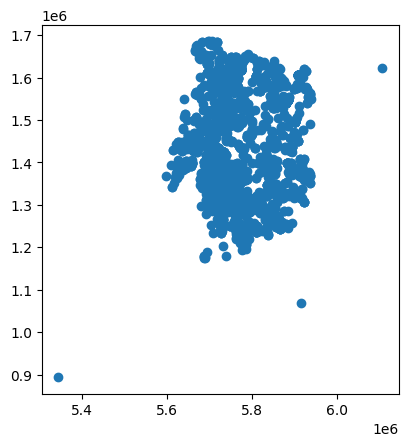

In [195]:
ax = gdf_clean_agropv2.plot()

In [176]:
gdf_clean_agropv3=gdf_clean_agropv2.to_crs(epsg=4839)
gdf_clean_agropv3.crs

<Derived Projected CRS: EPSG:4839>
Name: ETRS89 / LCC Germany (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Germany - onshore - states of Baden-Wurtemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thuringen.
- bounds: (5.86, 47.27, 15.04, 55.09)
Coordinate Operation:
- name: LCC Germany
- method: Lambert Conic Conformal (2SP)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

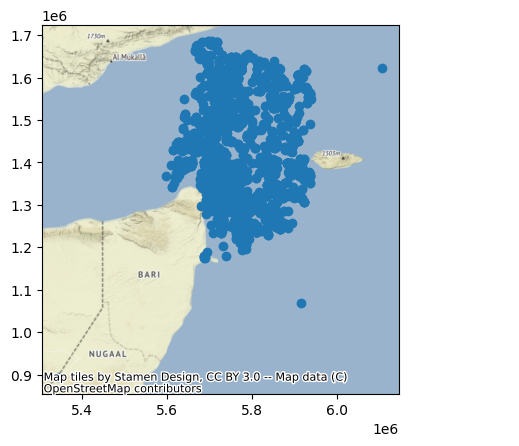

In [180]:
ax = gdf_clean_agropv3.plot()
cx.add_basemap(ax)

In [ ]:
fig,ax = plt.pyplot.subplots(figsize = (15,15))
data_shp2.plot(ax=ax)
gdf_clean_agropv.plot(ax=ax)

In [185]:
df_clean.Bundesland.unique()

array(['Sachsen', 'Sachsen-Anhalt', 'Brandenburg', 'Berlin'], dtype=object)

<bound method Series.unique of 0        9648
1        6198
2       39444
3        9648
4        6729
        ...  
2851     3205
2863     6385
2872     9481
2876     3058
2878     2633
Name: Postleitzahl, Length: 2390, dtype: int64>

,plz,note,einwohner,qkm,geometry
0,81248,81248 MÃ¼nchen,121,1.984763,"POLYGON ((66602.192 -316730.462, 66617.881 -31..."
1,60315,60315 Frankfurt am Main (FOUR),0,0.017481,"POLYGON ((-130600.253 -96999.923, -130596.216 ..."
2,24988,24988 Oeversee,3350,36.491463,"POLYGON ((-73187.602 412164.200, -73124.217 41..."
3,93185,93185 Michelsneukirchen,1786,32.873844,"POLYGON ((144178.029 -205248.489, 144203.254 -..."
4,93489,93489 Schorndorf,2622,38.597260,"POLYGON ((149279.380 -198748.014, 149313.213 -..."
...,...,...,...,...,...
8165,63874,63874 Dammbach,1819,32.868150,"POLYGON ((-87141.571 -125316.810, -87139.138 -..."
8166,63856,63856 Bessenbach,5844,29.859154,"POLYGON ((-91876.396 -114178.142, -91753.661 -..."
8167,63869,63869 HeigenbrÃ¼cken,2208,8.415089,"POLYGON ((-85674.726 -105338.176, -85466.099 -..."
8168,75339,75339 HÃ¶fen an der Enz,1619,9.081771,"POLYGON ((-143247.327 -243560.383, -143244.063..."


In [ ]:
df_clean.in